In [126]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

Data = pd.read_csv('DATA/dataset_Facebook.csv',  delimiter=";")
Data.columns = Data.columns.str.replace(' ', '_')
print(Data.columns.tolist())

['Page_total_likes', 'Type', 'Category', 'Post_Month', 'Post_Weekday', 'Post_Hour', 'Paid', 'Lifetime_Post_Total_Reach', 'Lifetime_Post_Total_Impressions', 'Lifetime_Engaged_Users', 'Lifetime_Post_Consumers', 'Lifetime_Post_Consumptions', 'Lifetime_Post_Impressions_by_people_who_have_liked_your_Page', 'Lifetime_Post_reach_by_people_who_like_your_Page', 'Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post', 'comment', 'like', 'share', 'Total_Interactions']


In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [69]:
conv = pd.to_numeric(Data['Paid'], 'coerce')


In [70]:
Data


,Page_total_likes,Type,Category,Post_Month,Post_Weekday,Post_Hour,Paid,Lifetime_Post_Total_Reach,Lifetime_Post_Total_Impressions,Lifetime_Engaged_Users,Lifetime_Post_Consumers,Lifetime_Post_Consumptions,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,comment,like,share,Total_Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [71]:
mask = conv.isna()
mask

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499     True
Name: Paid, Length: 500, dtype: bool

In [72]:
Data[conv.isna()]

,Page_total_likes,Type,Category,Post_Month,Post_Weekday,Post_Hour,Paid,Lifetime_Post_Total_Reach,Lifetime_Post_Total_Impressions,Lifetime_Engaged_Users,Lifetime_Post_Consumers,Lifetime_Post_Consumptions,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,comment,like,share,Total_Interactions
499,81370,Photo,2,1,4,4,NaN,4188,7292,564,524,743,3861,2200,316,0,91.0,28.0,119


In [13]:
Data.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [73]:
Data.loc[facebook['Paid'] != 0.0]
#ppl who paid for a post

,Page_total_likes,Type,Category,Post_Month,Post_Weekday,Post_Hour,Paid,Lifetime_Post_Total_Reach,Lifetime_Post_Total_Impressions,Lifetime_Engaged_Users,Lifetime_Post_Consumers,Lifetime_Post_Consumptions,Lifetime_Post_Impressions_by_people_who_have_liked_your_Page,Lifetime_Post_reach_by_people_who_like_your_Page,Lifetime_People_who_have_liked_your_Page_and_engaged_with_your_post,comment,like,share,Total_Interactions
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
14,138414,Photo,2,12,4,5,1.0,22784,39941,887,337,417,34415,19312,684,2,577.0,20.0,599
17,138414,Photo,1,12,2,12,1.0,53264,111785,1706,1103,1655,92512,39776,1307,15,678.0,20.0,713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,86909,Photo,3,1,6,16,1.0,5754,9238,1179,1143,1452,6101,3546,420,0,65.0,19.0,84
476,86909,Photo,1,1,6,10,1.0,37088,10966,2728,2288,3183,66311,34352,2021,7,579.0,47.0,633
481,86491,Link,1,1,4,4,1.0,4938,7910,66,63,70,6625,3804,59,0,5.0,2.0,7
491,85979,Photo,3,1,6,3,1.0,6184,10228,956,901,1140,6085,3502,437,1,105.0,46.0,152


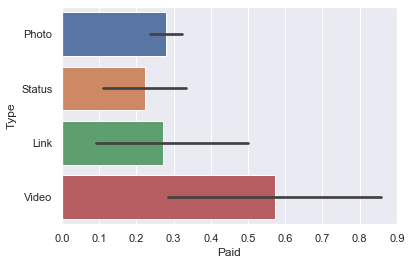

In [76]:
sns.set(style="darkgrid")
ax= sns.barplot(x=Data.Paid,y=Data.Type)
#paid posts by post month

In [59]:
Data.groupby('Post_Month').count()[['Paid']]

,Paid
Post_Month,
1,24
2,26
3,36
4,50
5,37
6,49
7,52
8,34
9,36


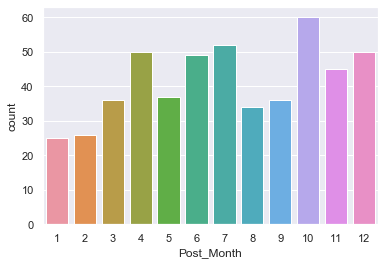

In [100]:
sns.set(style="darkgrid")
ax = sns.countplot(x=Data.Post_Month,)
#paid posts by post month

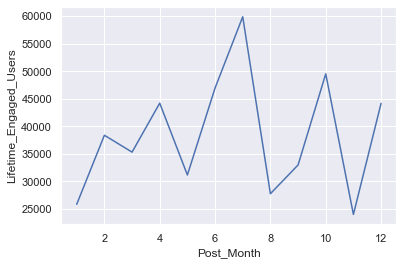

In [256]:
ox = sns.lineplot(x=leu.index, y=leu.Lifetime_Engaged_Users)
ox


In [212]:
ludf = Data['Post_Month']
ludf


0      12
1      12
2      12
3      12
4      12
       ..
495     1
496     1
497     1
498     1
499     1
Name: Post_Month, Length: 500, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

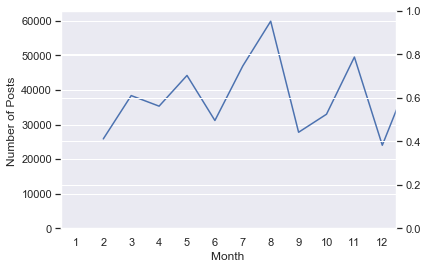

In [96]:
gfb = Data.groupby (['Type', 'Paid']).agg({'Total_Interactions': ['mean', 'median', 'sum']})
gfb.columns = ['intrx_mean', 'intrx_median', 'intrx_sum']
gfb

intrx_mean  intrx_median  intrx_sum
Type   Paid                                     
Link   0.0    95.812500          56.0       1533
       1.0    71.000000          51.0        426
Photo  0.0   191.248366         115.0      58522
       1.0   282.537815         149.0      33622
Status 0.0   181.571429         164.0       6355
       1.0   341.200000         277.5       3412
Video  0.0   285.666667         271.0        857
       1.0   303.500000         291.5       1214

In [340]:
doom = Data.groupby (['Post_Month']).agg({'Paid': ['count'], 'Lifetime_Engaged_Users': ['sum']})
doom.columns = ['postcount', 'Likect']
doom = doom.reset_index()
doom



,Post_Month,postcount,Likect
0,1,24,25851
1,2,26,38375
2,3,36,35316
3,4,50,44197
4,5,37,31167
5,6,49,46944
6,7,52,59876
7,8,34,27769
8,9,36,32982
9,10,60,49518


In [338]:
fig=plt.figure()
ax1 = plt.subplot(doom.index)
ax2 = plt.subplot(212, sharex = ax1)



TypeError: int() argument must be a string, a bytes-like object or a number, not 'Int64Index'

<Figure size 432x288 with 0 Axes>

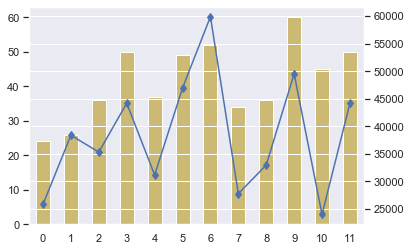

In [341]:
fig, ax1 = plt.subplots()

doom['postcount'].plot(kind='bar', color='y')
doom['Likect'].plot(kind='line', marker='d', secondary_y=True)
